# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   #### Pada tahap ini, saya menggunakan dataset Iris, sebuah dataset klasik yang memuat data tiga jenis bunga Iris beserta pengukuran sepal dan petal. Dataset ini dapat diambil langsung dari pustaka scikit-learn yang sudah built-in.



# **2. Import Library**

In [1]:
# Impor library yang diperlukan untuk analisis data, visualisasi, dan pembuatan model machine learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk mengambil dataset Iris dan pembagian data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Library untuk preprocessing data
from sklearn.preprocessing import StandardScaler

# Library untuk membangun model dan evaluasinya
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Menambahkan setting agar grafik tampil dengan baik
%matplotlib inline


# **3. Memuat Dataset**

In [6]:
# Mengambil dataset Iris dari pustaka scikit-learn
iris = load_iris()

# Pastikan iris adalah Bunch, bukan tuple
if isinstance(iris, tuple):
    iris = iris[0]

# Membuat DataFrame dari data iris. Kita menggabungkan fitur dan target.
df = pd.DataFrame(data=np.c_[iris.data, iris.target],
                  columns=iris.feature_names + ['target'])

# Tampilkan 5 baris awal untuk memastikan data telah dimuat dengan benar
print("5 Baris Awal Dataset Iris:")
print(df.head())


5 Baris Awal Dataset Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [3]:
# Simpan DataFrame sebagai file CSV dengan nama 'iris_raw.csv'
df.to_csv('iris_raw.csv', index=False)
print("File CSV 'iris_raw.csv' berhasil disimpan!")


File CSV 'iris_raw.csv' berhasil disimpan!


# **4. Exploratory Data Analysis (EDA)**


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None

Statistik Deskriptif:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6

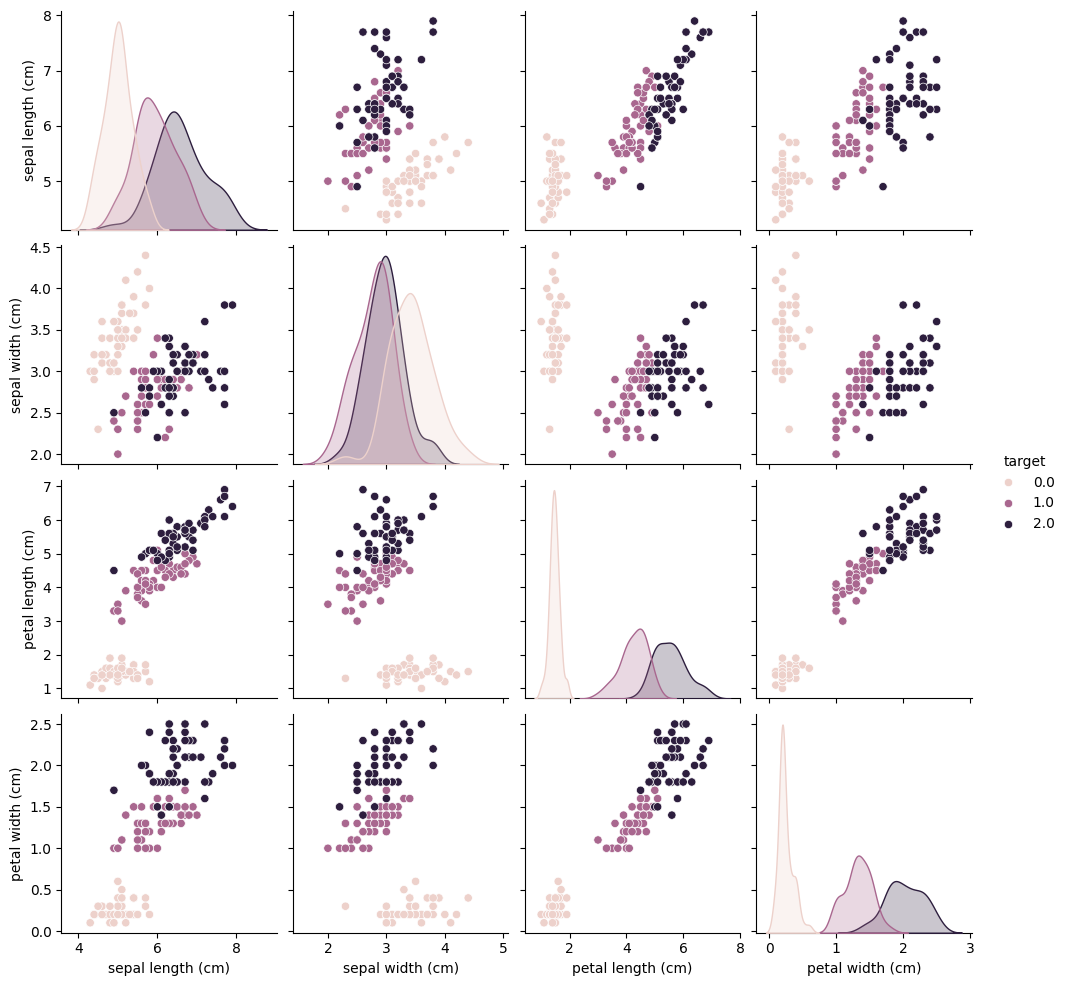

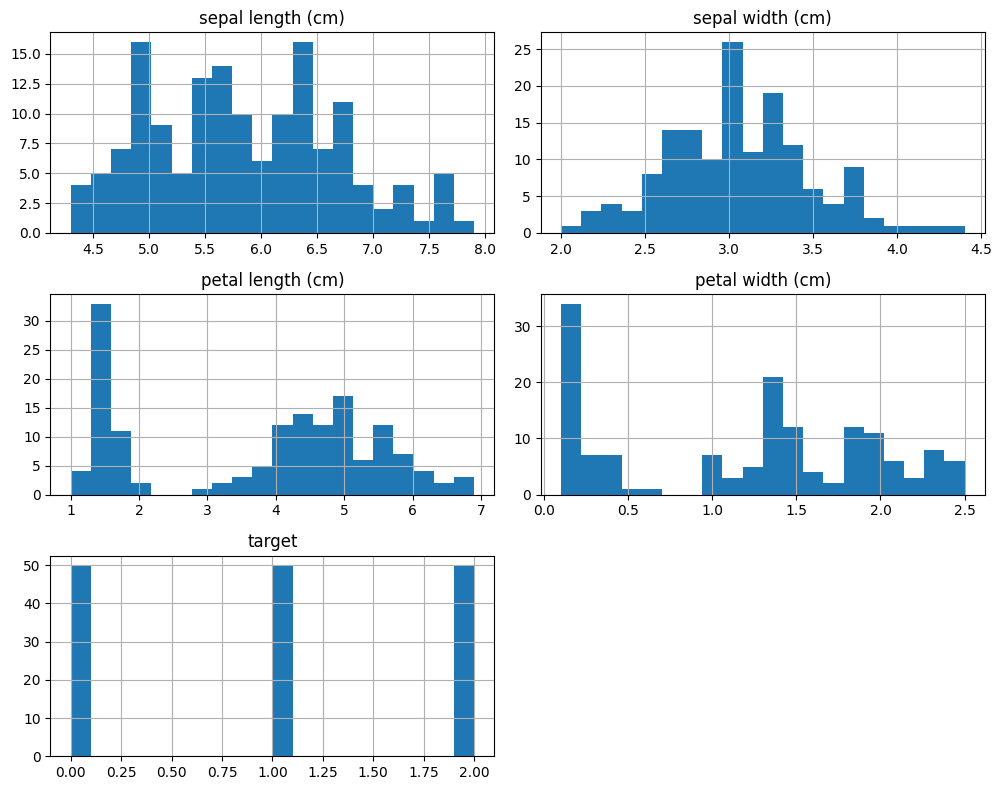

In [4]:
# Melihat informasi umum dataset
print("\nInformasi Dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Visualisasi untuk memahami hubungan antar fitur
sns.pairplot(df, hue='target')
plt.show()

# Optional: Visualisasi distribusi setiap fitur secara terpisah
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

In [ ]:
# Mengecek nilai kosong di setiap kolom
print("Jumlah Missing Value Per Kolom:")
print(df.isnull().sum())

# Menghapus duplikasi (jika ada)
df = df.drop_duplicates()
print("\nShape dataset setelah menghapus duplikasi:", df.shape)

# Memisahkan variabel fitur (X) dan target (y)
X = df.iloc[:, :-1]   # semua kolom kecuali target
y = df['target']      # kolom target

# Standarisasi fitur menggunakan StandardScaler agar data memiliki mean 0 dan varians 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi dataset menjadi data training dan testing (misal 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Jumlah Missing Value Per Kolom:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Shape dataset setelah menghapus duplikasi: (149, 5)
